# Decision tree Pre pruning with Hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()

# creating dataset using seaborn
import seaborn as sns
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x = df.iloc[:,:-1]

y = dataset.target

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.33, random_state = 42)

# Pre pruning

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [ 1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [7]:
from sklearn.model_selection import GridSearchCV

In [16]:
treeClassifier = DecisionTreeClassifier()

clf = GridSearchCV(treeClassifier, param_grid= parameters, cv = 5, scoring = 'accuracy')

In [17]:
# train the data
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [18]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [23]:
treeClassifier.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0

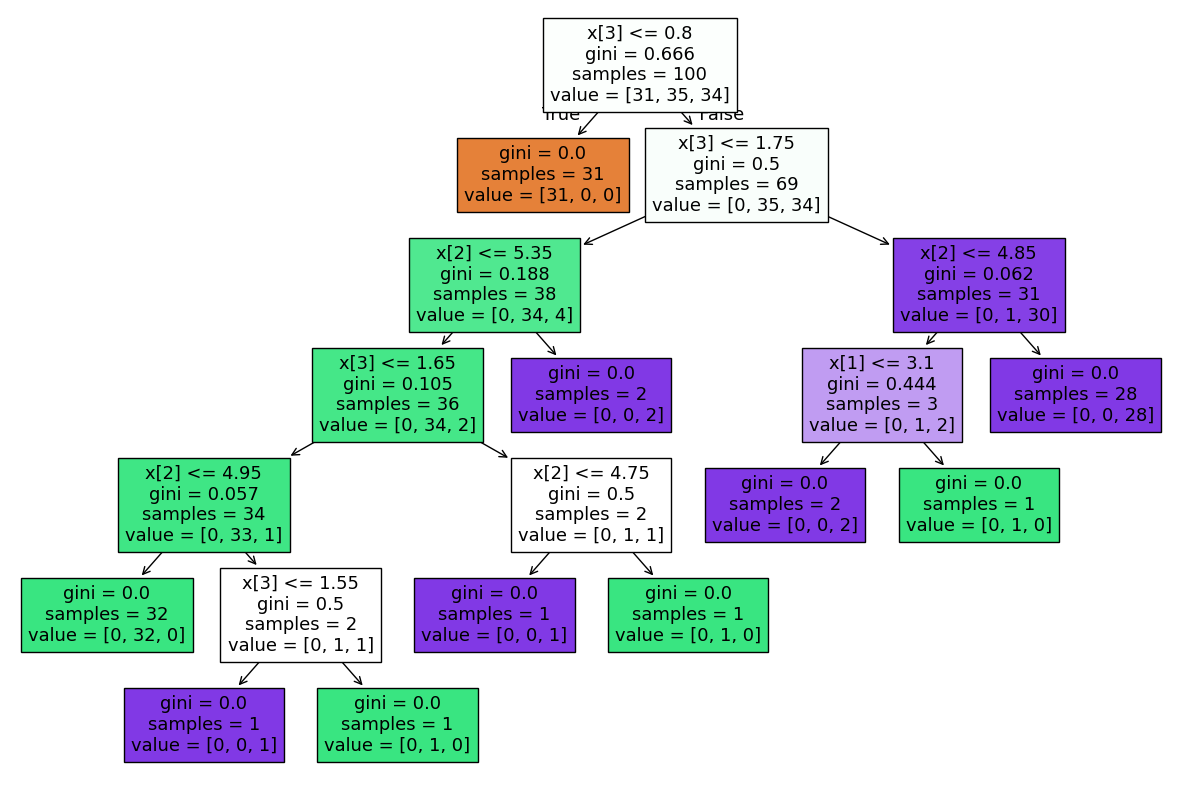

In [24]:
# Visualizing the created tree

from sklearn import tree
plt.figure(figsize =(15,10))

tree.plot_tree(treeClassifier, filled = True)

# Creating decision tree with these best params

## Prepruning

In [34]:
treeClassifier_best = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, max_features = 'log2', splitter = 'best')

In [35]:
treeClassifier_best.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2')

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.6\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.229\nsamples = 38\nvalue = [0, 5, 33]'),
 Text(0.625, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [0, 4, 3]'),
 Text(0.875, 0.125, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

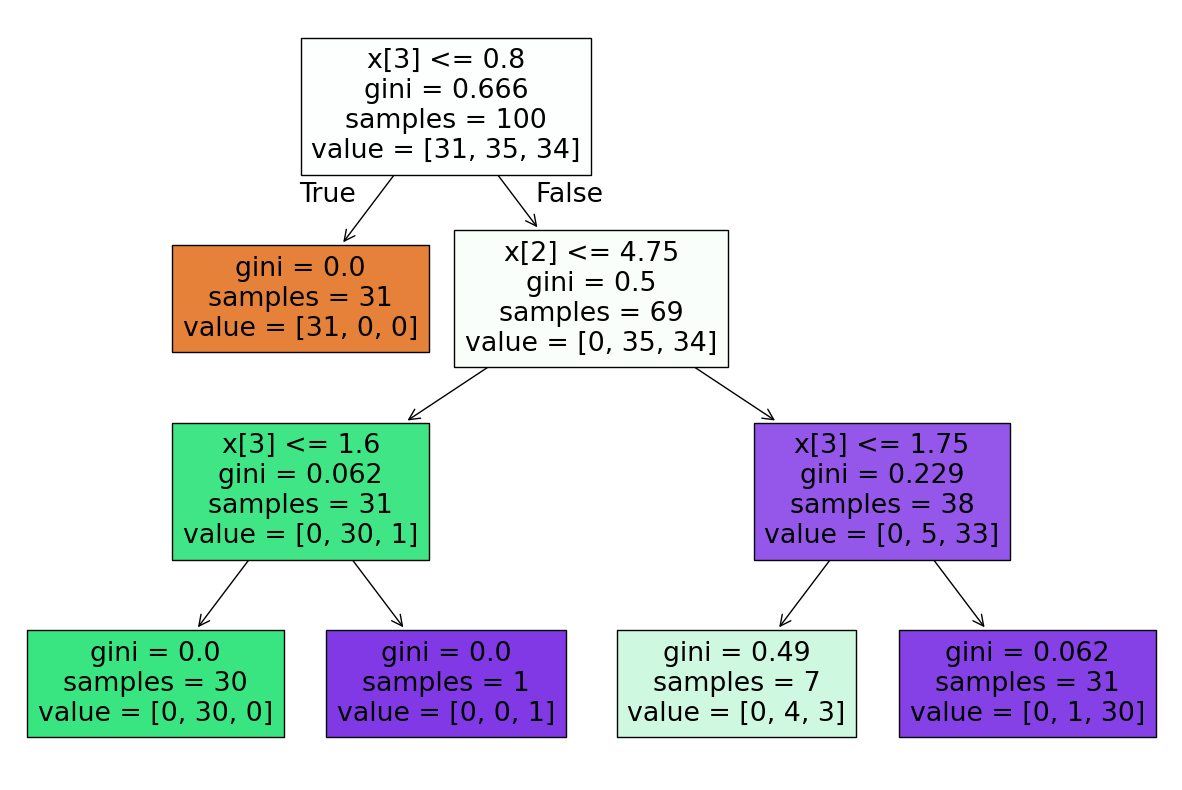

In [36]:
# Visualizing the created tree with prepruning

from sklearn import tree
plt.figure(figsize =(15,10))

tree.plot_tree(treeClassifier_best, filled = True)

# Performance metrics

In [37]:
y_pred = clf.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion matrix -> \n", confusion_matrix(y_test, y_pred))

print("Accuracy score -> ", accuracy_score(y_test, y_pred))

print("Classification report -> \n", classification_report(y_test, y_pred))

Confusion matrix -> 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Accuracy score ->  0.98
Classification report -> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Performance metrics after prepruning

In [38]:
y_pred_pre = treeClassifier_best.predict(x_test)

In [39]:
print("Confusion matrix -> \n", confusion_matrix(y_test, y_pred))

print("Accuracy score -> ", accuracy_score(y_test, y_pred))

print("Classification report -> \n", classification_report(y_test, y_pred))

Confusion matrix -> 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Accuracy score ->  0.98
Classification report -> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Analysis: Both cases Performance metrics, accuracy is same.